In [1]:
%ls commercial_info_201812

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: BE61-B85F

 c:\BigData\Opendata\commercial_info_201812 디렉터리

2019-02-12  오후 02:56    <DIR>          .
2019-02-12  오후 02:56    <DIR>          ..
2019-02-12  오후 02:48        42,574,428 commercial_static_2017_.csv
2019-02-01  오후 05:27       229,866,473 commercial_store_201812_1.csv
2019-02-01  오후 05:46       209,719,479 commercial_store_201812_2.csv
2019-02-01  오후 05:53       350,993,669 commercial_store_201812_3.csv
2019-02-01  오후 05:54       319,466,329 commercial_store_201812_4.csv
               5개 파일       1,152,620,378 바이트
               2개 디렉터리  16,213,442,560 바이트 남음


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
from plotnine import *
import folium

In [4]:
shop_2018 = pd.read_csv('c://BigData/Opendata/commercial_info_201812/commercial_store_201812_1.csv', encoding='cp949')
shop_2018.head()

상가업소번호            상호명         지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  상권업종중분류명  \
0  19905471         와라와라호프         NaN         Q       음식       Q09      유흥주점   
1  19911397  커피빈코리아선릉로93길점  코리아선릉로93길점         Q       음식       Q12    커피점/카페   
2  19911801           프로포즈         NaN         Q       음식       Q09      유흥주점   
3  19912201       싱싱커피&토스트         NaN         Q       음식       Q07     패스트푸드   
4  19932756       가락사우나내스낵         NaN         F    생활서비스       F09  대중목욕탕/휴게   

  상권업종소분류코드     상권업종소분류명 표준산업분류코드    ...                         건물관리번호  \
0    Q09A01        호프/맥주   I56219    ...      1168010600106040000014378   
1    Q12A01  커피전문점/카페/다방   I56220    ...      1168010100106960042022041   
2    Q09A01        호프/맥주   I56219    ...      1154510200101620001017748   
3    Q07A10        토스트전문   I56192    ...      2653010400105780000002037   
4    F09A02   사우나/증기탕/온천   S96121    ...      1171010500102560005010490   

        건물명                 도로명주소   구우편번호    신우편번호  동정보 층정보  호정보          경도  \
0      대치상가  서울특별시 강남구 남부순환로 2933  135280   6280.0  NaN   1  NaN  127.061026   
1       NaN    서울특별시 강남구 선릉로93길 6  135080   6149.0  NaN   1  NaN  127.047883   
2       NaN    서울특별시 금천구 가산로 34-6  153010   8545.0  NaN   1  NaN  126.899220   
3  산업용품유통상가      부산광역시 사상구 괘감로 37  617726  46977.0  NaN   1   26  128.980455   
4       NaN      서울특별시 송파구 가락로 71  138846   5690.0  NaN   1  NaN  127.104071   

          위도  
0  37.493922  
1  37.505675  
2  37.471711  
3  35.159774  
4  37.500249  

[5 rows x 39 columns]

In [5]:
shop_2018.shape

(500527, 39)

In [6]:
coffee = shop_2018[shop_2018['상권업종소분류명'].str.contains('커피')]
coffee.shape

(20649, 39)

In [7]:
coffee.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [8]:
coffee['상호명'].unique().shape

(13719,)

In [9]:
coffee.loc[coffee['상호명'].str.contains('스타벅스'),'상호명'].unique()

array(['스타벅스종로3가점', '스타벅스커피여의도IFC1F', '스타벅스', '스타벅스신림사거리점', '스타벅스커피홍대역',
       '스타벅스올림픽평화의문점', '스타벅스새문안로점', '스타벅스연신내역', '스타벅스연세백양로점',
       '스타벅스가락시장역점', '스타벅스외대점', '스타벅스석촌역', '스타벅스명지대점', '스타벅스압구정로데오역',
       '스타벅스연대동문', '스타벅스강남삼성타운점', '스타벅스서울대입구역점', '스타벅스신림점', '스타벅스광장점',
       '스타벅스사당점', '스타벅스신촌명물거리점', '스타벅스명동미래', '스타벅스건국클래식점', '스타벅스연희DT점',
       '스타벅스삼선교점', '스타벅스충정타워', '스타벅스올림픽공원북문점', '스타벅스커피여의도호성', '스타벅스이수역점',
       '스타벅스방배카페입구', '스타벅스종각점', '스타벅스W-MALL점', '스타벅스용산역점', '스타벅스마포일진빌딩점',
       '스타벅스천호로데오점', '스타벅스중계역점', '스타벅스명동메트로', '스타벅스마포아크로타워점',
       '스타벅스남부터미널2점', '스타벅스구로디지털로점', '스타벅스중랑구청점', '스타벅스논현힐탑', '스타벅스종로관수점',
       '스타벅스부산서면', '스타벅스삼성도심공항점', '스타벅스종로2가점', '스타벅스선정릉역점', '스타벅스미아역점',
       '스타벅스선릉로점', '스타벅스커피신도림디큐브시티B2', '스타벅스역삼럭키', '스타벅스이태원거리점',
       '스타벅스구로에이스트윈타워1점', '스타벅스을지로입구', '스타벅스교대역점', '스타벅스서울중앙우체국점',
       '스타벅스삼성교점', '스타벅스남산스테이트', '스타벅스구로하이엔드점', '스타벅스명일이마트점',
       '스타벅스조선호텔후문', '스타벅스목동점', '스타벅스커리학동사거리점', '스타벅스서울교대점',
       '스타벅스강북구청사거리점', '스타벅스청담사거리점', '스타

In [10]:
coffee['시도명'].isnull().sum()

0

In [11]:
coffee['시도명'].value_counts()

서울특별시    16127
부산광역시     4522
Name: 시도명, dtype: int64

In [12]:
coffee['시군구명'].unique()

array(['강남구', '영등포구', '중구', '서초구', '성북구', '구로구', '마포구', '종로구', '도봉구',
       '남구', '기장군', '광진구', '은평구', '서대문구', '해운대구', '양천구', '관악구', '성동구',
       '사상구', '금천구', '송파구', '동대문구', '사하구', '강서구', '금정구', '동작구', '중랑구',
       '북구', '강동구', '용산구', '연제구', '노원구', '부산진구', '강북구', '수영구', '동구',
       '동래구', '영도구', '서구'], dtype=object)

In [13]:
coffee['상권업종소분류명'].value_counts()

커피전문점/카페/다방    20649
Name: 상권업종소분류명, dtype: int64

In [14]:
from matplotlib import font_manager, rc 
path= 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name )

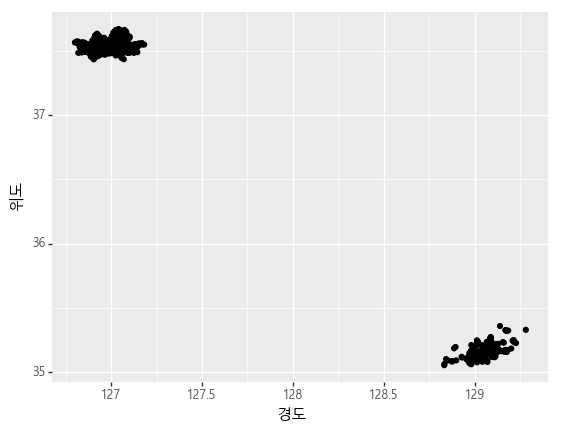

<ggplot: (164825472239)>

In [15]:
(ggplot(shop_2018[:1000])
 + aes(x='경도',y='위도')
 + geom_point()
 + theme(text=element_text(family=font_name)))

In [16]:
df_seoul = shop_2018.loc[shop_2018['시도명'].str.contains('서울')].copy()
df_seoul.shape

(346131, 39)

In [17]:
df_seoul.isnull().sum()

상가업소번호            0
상호명               0
지점명          295868
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      20018
표준산업분류명       20018
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         67123
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        304059
건물관리번호            0
건물명          180914
도로명주소             0
구우편번호             0
신우편번호             2
동정보          320099
층정보          103184
호정보          297845
경도                0
위도                0
dtype: int64

In [18]:
df_seoul['상권업종소분류명'].value_counts()

한식/백반/한정식      23863
커피전문점/카페/다방    16127
여성미용실          16020
부동산중개          12537
일반의류            9722
편의점             8406
종합소매            7555
호프/맥주           7366
라면김밥분식          6522
학원-입시           6350
비만/피부관리         5495
세탁소/빨래방         5397
화장품판매점          5006
후라이드/양념치킨       4393
수퍼마켓            4366
어린이집            4325
갈비/삼겹살          4253
학원(종합)          4075
노래방             3803
정통양식/경양식        3552
제과점             3482
인쇄종합            3474
자동차정비/카센타       3295
핸드폰소매           3090
약국              3024
학원-외국어/어학       2952
중국음식/중국집        2712
발/네일케어          2686
피아노/바이올린/기타     2569
국수/만두/칼국수       2533
               ...  
학원-스튜디어스           1
현미경/망원경판매          1
음악감상               1
등세공품판매             1
학원-섬유기술            1
토종닭전문              1
사진/원고/기록물대여        1
특수사진기              1
학원-세탁기술            1
드라이아이스판매           1
화환/화분대여            1
롤러스케이트장            1
테니스장               1
학원-비디오             1
학원-레크리에이션          1
낚시터                1
제기용품판매       

In [19]:
df_seoul.describe(include=np.object)

상호명    지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
count   346131  50263    346131   346131    346131   346131    346131   
unique  239722  19715         9        9        94       94       693   
top      점프셈교실     본점         Q       음식       Q01       한식    Q01A01   
freq      1709    304    113212   113212     36377    36377     23863   

         상권업종소분류명 표준산업분류코드  표준산업분류명  ...      법정동명   대지구분명  \
count      346131   326113   326113  ...    346131  346131   
unique        693      210      210  ...       465       2   
top     한식/백반/한정식   I56111  한식 음식점업  ...       신림동      대지   
freq        23863    44724    44724  ...      6930  345771   

                        지번주소             도로명                     건물관리번호  \
count                 346131          346131                     346131   
unique                125357           11895                     125940   
top     서울특별시 종로구 종로6가 262-1  서울특별시 서초구 신반포로  1111016400102700003012054   
freq                     975            3246                       1007   

            건물명             도로명주소    동정보     층정보    호정보  
count    165217            346131  26032  242947  48286  
unique    25625            125141    927     122   2539  
top     동대문종합시장  서울특별시 종로구 종로 266      1       1      1  
freq       1010               994   4540  163773   5708  

[4 rows x 23 columns]

In [20]:
df_seoul.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [21]:

df_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346131 entries, 0 to 500526
Data columns (total 39 columns):
상가업소번호       346131 non-null int64
상호명          346131 non-null object
지점명          50263 non-null object
상권업종대분류코드    346131 non-null object
상권업종대분류명     346131 non-null object
상권업종중분류코드    346131 non-null object
상권업종중분류명     346131 non-null object
상권업종소분류코드    346131 non-null object
상권업종소분류명     346131 non-null object
표준산업분류코드     326113 non-null object
표준산업분류명      326113 non-null object
시도코드         346131 non-null int64
시도명          346131 non-null object
시군구코드        346131 non-null int64
시군구명         346131 non-null object
행정동코드        346131 non-null int64
행정동명         346131 non-null object
법정동코드        346131 non-null int64
법정동명         346131 non-null object
지번코드         346131 non-null int64
대지구분코드       346131 non-null int64
대지구분명        346131 non-null object
지번본번지        346131 non-null int64
지번부번지        279008 non-null float64
지번주소         346131 non-null obje

In [22]:
df_seoul[['경도','위도']].describe(include=np.number)

경도             위도
count  346131.000000  346131.000000
mean      126.994665      37.545310
std         0.081640       0.049124
min       126.768169      37.434081
25%       126.924830      37.504903
50%       127.008049      37.542095
75%       127.055645      37.573373
max       127.182588      37.692398

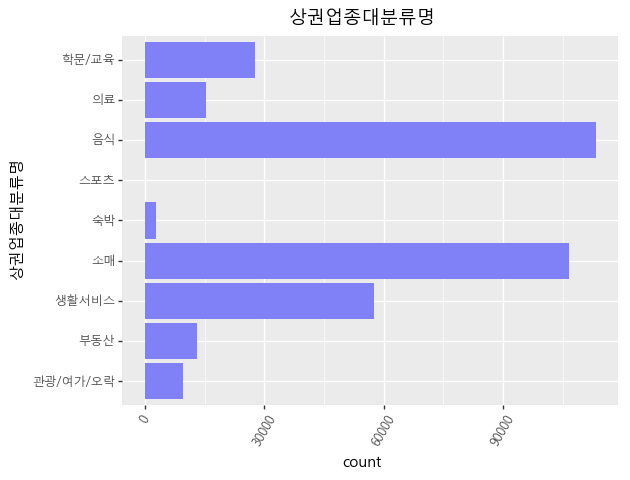

<ggplot: (-9223371872028982005)>

In [23]:
(ggplot(df_seoul)
 + aes('상권업종대분류명')
 + geom_bar(fill='#8181F7')
 + ggtitle('상권업종대분류명')
 + coord_flip()
 + theme(text=element_text(family=font_name), axis_text_x = element_text(rotation=60)))

In [24]:
df_food = df_seoul.loc[df_seoul['상권업종대분류명'].str.contains('음식')]
df_food.shape

(113212, 39)

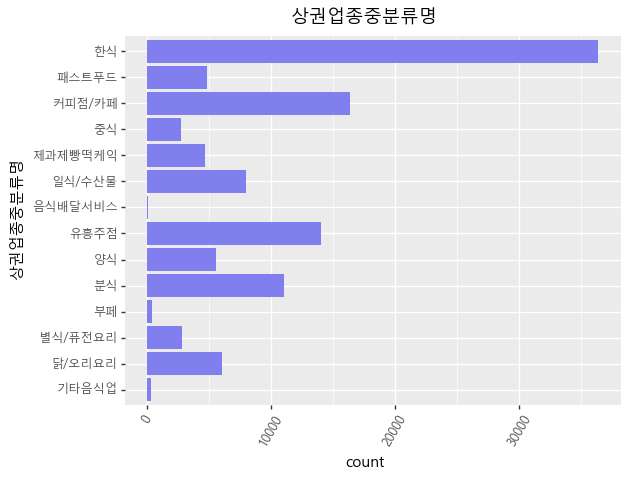

<ggplot: (-9223371872029075701)>

In [25]:
(ggplot(df_food)
 + aes('상권업종중분류명')
 + geom_bar(fill='#817FEE')
 + ggtitle('상권업종중분류명')
 + coord_flip()
 + theme(text=element_text(family=font_name),
        axis_text_x=element_text(rotation=60))
)

In [26]:
df_fast_food = df_seoul.loc[df_seoul['상권업종중분류명'] =='패스트푸드']
df_fast_food.shape

(4824, 39)

In [27]:
df_food.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [28]:
df_fast_food['상호명'].unique()

array(['피자마루', '롯데리아', '메가박스상봉', ..., '훌랄라참숯바베큐', '리코푸드코리아', '한스'],
      dtype=object)

## 베스킨라빈스와 던킨도너츠 입지분석

In [29]:
df_31 = df_seoul[df_seoul['상호명'].str.contains('배스킨|던킨')].copy()
df_31.shape

(446, 39)

In [30]:
df_31 = df_31[['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', 
               '지번주소', '도로명주소',  '위도', '경도', '시군구명', '행정동명']].copy()
df_31.shape

(446, 10)

In [31]:
df_31.head()

상호명     지점명 상권업종대분류명 상권업종중분류명                    지번주소  \
77           배스킨라빈스   관악구청점       음식    패스트푸드    서울특별시 관악구 봉천동 863-13   
1545    던킨도너츠테크노마트점  테크노마트점       음식    패스트푸드     서울특별시 광진구 구의동 546-4   
1881     던킨도너츠창동하나로     NaN       음식    패스트푸드       서울특별시 도봉구 창동 1-10   
1910  던킨도너츠용산민자역사2호     NaN       음식    패스트푸드  서울특별시 용산구 한강로3가 40-999   
2412          던킨도너츠   잠실본동점       음식    패스트푸드     서울특별시 송파구 잠실동 242-9   

                     도로명주소         위도          경도 시군구명  행정동명  
77       서울특별시 관악구 관악로 161  37.479599  126.952166  관악구   청룡동  
1545  서울특별시 광진구 광나루로56길 85  37.535713  127.095681  광진구  구의3동  
1881   서울특별시 도봉구 마들로11길 20  37.655101  127.050818  도봉구   창4동  
1910  서울특별시 용산구 한강대로21나길 7  37.527903  126.963223  용산구  한강로동  
2412   서울특별시 송파구 석촌호수로 118  37.507431  127.090005  송파구  잠실본동

In [32]:
df_31['상호명'].value_counts()

배스킨라빈스31               108
던킨도너츠                   86
배스킨라빈스                  46
던킨도넛                     4
비알코리아던킨도너츠서울             1
비알코리아던킨도너츠서여             1
배스킨라빈스31양재매헌점            1
배스킨라빈스서울베이비키즈페어임시부스      1
배스킨라빈스용산후암               1
던킨도너츠합정역사점               1
배스킨라빈스31가락본동점            1
던킨도너츠방화역점                1
배스킨라빈스31당산역점             1
배스킨라빈스31서초점              1
배스킨라빈스31응암점              1
던킨도너츠용산민자역사2호            1
던킨도너츠공항철도서울역사            1
성북역맞이방던킨도너츠              1
배스킨라빈스브라운청담점             1
배스킨라빈스31신도림테크노마트점        1
비알코리아던킨도너츠동부             1
던킨도너츠신림양지병원점             1
던킨도너츠압구정역점               1
배스킨라빈스31신풍역점             1
배스킨라빈스31보문역점             1
배스킨라빈스위례아이파크점            1
배스킨라빈스31장승배기역점           1
배스킨라빈스31선유도역             1
던킨커피포워드강남스퀘어             1
배스킨라빈스31미아삼거리점           1
                      ... 
배스킨라빈스31구로오류동            1
코레일유통커피앤던킨도너츠            1
비알코리아던킨도너츠두산             1
배스킨라빈스31신정네거리점           1
배스킨라빈스31마포용강점            1
배스킨라빈스31둔촌역점             1
배

In [33]:
df_31['브랜드명'] =''

In [34]:
df_31[['상호명', '브랜드명']].head()

상호명 브랜드명
77           배스킨라빈스     
1545    던킨도너츠테크노마트점     
1881     던킨도너츠창동하나로     
1910  던킨도너츠용산민자역사2호     
2412          던킨도너츠

In [35]:
df_31.loc[df_31['상호명'].str.contains('배스킨'), '브랜드명'] = '배스킨라빈스'
df_31.loc[df_31['상호명'].str.contains('던킨'),'브랜드명'] = '던킨도너츠'

In [36]:
df_31[['상호명','브랜드명']].head()

상호명    브랜드명
77           배스킨라빈스  배스킨라빈스
1545    던킨도너츠테크노마트점   던킨도너츠
1881     던킨도너츠창동하나로   던킨도너츠
1910  던킨도너츠용산민자역사2호   던킨도너츠
2412          던킨도너츠   던킨도너츠

In [37]:
df_31_group_count = df_31['브랜드명'].value_counts()
df_31_group_count

배스킨라빈스    298
던킨도너츠     148
Name: 브랜드명, dtype: int64

In [38]:
df_31_ratio = df_31_group_count[0]/df_31_group_count[1]
print('제공된 데이터로 봤을 때 서울에 배스킨 매장이 던킨보다 {0:.2f} 배 정도 더 많다'. format(df_31_ratio))

제공된 데이터로 봤을 때 서울에 배스킨 매장이 던킨보다 2.01 배 정도 더 많다


In [39]:
df_31.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 77 to 500522
Data columns (total 11 columns):
상호명         446 non-null object
지점명         376 non-null object
상권업종대분류명    446 non-null object
상권업종중분류명    446 non-null object
지번주소        446 non-null object
도로명주소       446 non-null object
위도          446 non-null float64
경도          446 non-null float64
시군구명        446 non-null object
행정동명        446 non-null object
브랜드명        446 non-null object
dtypes: float64(2), object(9)
memory usage: 41.8+ KB


In [40]:
df_31['위도'] = df_31['위도'].astype(float)
df_31['경도'] = df_31['경도'].astype(float)

C:\Anaconda3\lib\site-packages\plotnine\guides\guides.py:198: UserWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


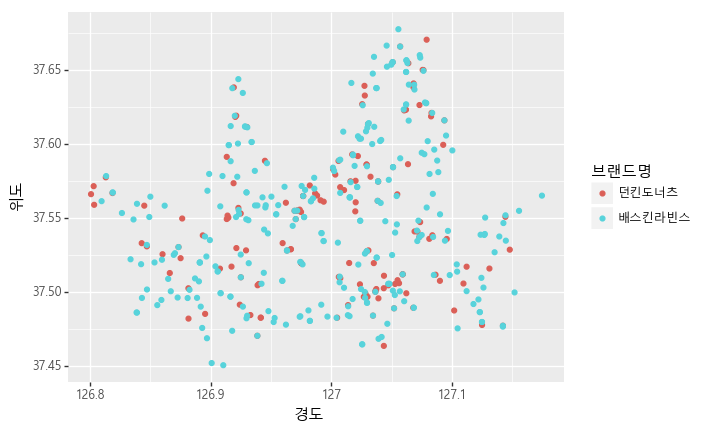

<ggplot: (-9223371872028986438)>

In [41]:
(ggplot(df_31)
 + aes(x='경도',y='위도', color='브랜드명')
 + geom_point()
 + theme(text=element_text(family=font_name))
 + scale_fill_gradient(low='blue', high='green'))

 ## Folium 사용예제

In [42]:
#folium.Map?

In [43]:
geo_df = df_31.copy()

# 지도를 초기화 해줄 때 어디를 중심으로 보여줄지 설정.
# 우리가 가져온 데이터프레임 안에 있는 데이터를 기준으로 출력할 수 있도록 위경도의 평균값을 구해옴

map = folium.Map(location=[geo_df['위도'].mean(),geo_df['경도'].mean()], zoom_start=12 )

for n in geo_df.index:
    #팝업에 들어갈 텍스트를 지정
    popup_name = geo_df['브랜드명'][n] + ' - ' + geo_df['도로명주소'][n]
    #브랜드명에 따라 아이콘 색상을 달리해서 찍어줌
    if geo_df['브랜드명'][n] == '던킨도너츠':
        icon_color = 'pink'
    else:
        icon_color = 'blue'
        
    folium.Marker([geo_df['위도'][n], geo_df['경도'][n]],
                  popup=popup_name, icon=folium.Icon(color=icon_color)).add_to(map)
    
map

In [44]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12, tiles='Stamen Toner')

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df['브랜드명'][n] + ' - ' + geo_df['도로명주소'][n]
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df['브랜드명'][n] == '던킨도너츠' :
        icon_color = 'red'
    else:
        icon_color = 'blue'    
    
    folium.CircleMarker(location=[geo_df['위도'][n], geo_df['경도'][n]],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

map

## 뚜레쥬르, 파리바게트 매장 위치 분석

In [45]:
df_bread = df_seoul.loc[df_seoul['상호명'].str.contains('뚜레쥬르|파리(바게|크라상)') & (~df_seoul['상호명'].str.contains('파스쿠찌|잠바주스'))].copy()
# 파스쿠찌 상호명에 파리크라상이 들어가기 때문에 파스쿠찌는 제외
df_bread.shape

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


(651, 39)

In [46]:
df_bread['상호명'].value_counts()

파리바게뜨               211
뚜레쥬르                133
파리크라상                12
파리바게뜨성북점              2
파리바게뜨월계미성             2
파리바게뜨카페대학로점           2
씨제이뚜레쥬르               2
파리바게트도곡렉슬             1
뚜레쥬르종로구청점             1
파리바게뜨신풍역점             1
파리바게트선릉아이타워인셉터        1
파리바게뜨압구정현대점           1
파리바게트2011년            1
파리바게뜨종로구청             1
신목파리바게뜨               1
여의도2호파리크라상            1
파리바게뜨까페               1
파리바게뜨수서동성당점           1
파리바게뜨논현경복점            1
파리크라상이대점              1
파리바게뜨학동역점             1
파리바게트혜화로타리            1
파리바게뜨카페당산동행복점         1
파리바게뜨난곡점              1
뚜레쥬르신이문               1
파리바게뜨외대점              1
뚜레쥬르영등포역              1
파리바게뜨회기역점             1
뚜레쥬르강서보건소             1
뚜레쥬르왕십리센트라스점          1
                   ... 
뚜레쥬르엔시티보라매            1
파리바게뜨휘경점              1
파리바게트17789위례아이파크      1
강동경희파리바게뜨             1
파리바게트서초참누리인셉터         1
파리바게뜨청담사거리점           1
파리바게뜨당고개              1
파리바게뜨대림시장점            1
파리크라상서래점              1
파리바게뜨논현               1
파리바게뜨신길돈보스코점    

In [47]:
df_bread.loc[df_bread['상호명'].str.contains('파리(바게|크라상)'), '브랜드명'] = '파리바게트'
df_bread.loc[df_bread['상호명'].str.contains('뚜레(쥬|주)르'), '브랜드명'] = '뚜레쥬르'


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [48]:
df_bread_group_count = df_bread['브랜드명'].value_counts()
df_bread_group_count

파리바게트    446
뚜레쥬르     205
Name: 브랜드명, dtype: int64

In [49]:
df_bread.shape

(651, 40)

In [50]:
df_bread_ratio= df_bread_group_count[0]/ df_bread_group_count[1]
print('제공된 데이터로 봤을 때 서울에는 파리바게뜨가 뚜레쥬르보다'
       ' 매장이 {0:.2f}배 가량 많습니다.'.format(df_bread_ratio))

제공된 데이터로 봤을 때 서울에는 파리바게뜨가 뚜레쥬르보다 매장이 2.18배 가량 많습니다.


C:\Anaconda3\lib\site-packages\plotnine\guides\guides.py:198: UserWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


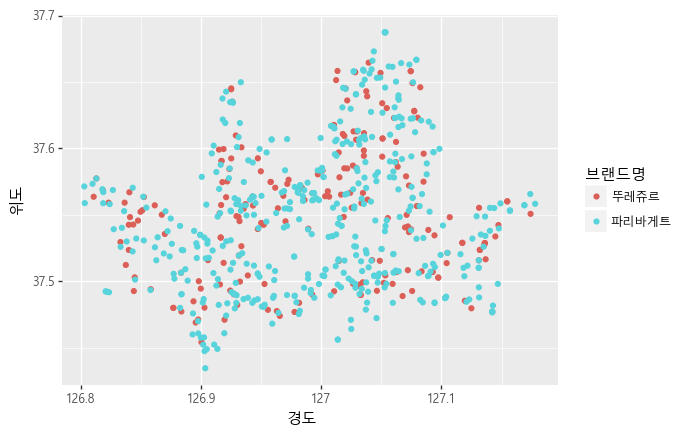

<ggplot: (-9223371872028973771)>

In [51]:
(ggplot(df_bread)
 + aes (x='경도', y='위도', color='브랜드명')
 + geom_point()
 + theme(text=element_text(family=font_name))
 + scale_fill_gradient(low='blue', high='green'))

In [52]:
geo_df = df_bread.copy()

# 지도를 초기화 해줄때 어디를 중심으로 할지
# 우리가 가져온 데이터로 위경도 평균값 구함

map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12)

for n in geo_df.index:
    popup_name=geo_df['브랜드명'][n] + '- ' + geo_df['도로명주소'][n]
    if geo_df['브랜드명'][n] == '뚜레쥬르':
        icon_color='green'
    else:
        icon_color='blue'
        
    folium.Marker([geo_df['위도'][n],geo_df['경도'][n]],popup=popup_name,
                  icon = folium.Icon(color=icon_color)).add_to(map)
    
map

In [53]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12, tiles='Stamen Toner')

for n in geo_df.index:
    popup_name = geo_df.loc[n, '브랜드명'] + ' - ' + geo_df.loc[n,'도로명주소']
    if geo_df.loc[n, '브랜드명'] == '뚜레쥬르':
          icon_color = 'green'
    else:
        icon_color='blue'
        
    folium.CircleMarker(location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
                        radius=3,
                       popup= popup_name,
                       color= icon_color,
                       fill=True,
                       fill_color=icon_color).add_to(map)
    
map

[코드 깃허브주소](https://github.com/corazzon/OpenDataWrangling/blob/master/store_location_by_folium.ipynb)

## 스타벅스, 이디야 위치분석

[비즈&빅데이터_스타벅스'쏠림 vs 이디야'분산'](http://news.bizwatch.co.kr/article/consumer/2018/01/19/0015)

In [54]:
df_seoul.loc[df_seoul['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'),'상호명'].shape

(472,)

In [55]:
df_seoul.loc[df_seoul['상호명'].str.contains('이디야|ediya|EDIYA'),'상호명'].shape

(465,)

In [56]:
df_cafe = df_seoul[df_seoul['상호명'].str.contains('스타벅스|starbucks|STARBUCKS|이디야|ediya|EDIYA')]
df_cafe.shape

(937, 39)

In [57]:
df_cafe.loc[df_cafe['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'), '브랜드명'] = '스타벅스'

In [58]:
#df_cafe.loc[~df_cafe['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'), '브랜드명'] = '이디야'

In [59]:
df_cafe['브랜드명'] = df_cafe['브랜드명'].fillna('이디야')

In [60]:
df_cafe.loc[df_cafe['브랜드명'].isnull(),'상호명'].head()

Series([], Name: 상호명, dtype: object)

In [61]:
df_cafe[['브랜드명','상호명']].head()

브랜드명        상호명
1402    이디야      이디야커피
1619   스타벅스  스타벅스종로3가점
2433    이디야      이디야커피
7380    이디야      이디야커피
12314   이디야      이디야커피

In [62]:
df_cafe['브랜드명'].value_counts()

스타벅스    472
이디야     465
Name: 브랜드명, dtype: int64

In [63]:
geo_df = df_cafe

In [64]:
map= folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12, tiles='Stamen Toner')

for n in geo_df.index:
    #팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n,'상호명'] + ' - ' + geo_df.loc[n,'도로명주소']
    #브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n,'브랜드명'] == '스타벅스':
        icon_color ='green'
    else:
        icon_color ='blue'
        
    folium.CircleMarker(
        location=[geo_df.loc[n,'위도'], geo_df.loc[n,'경도']],
        radius=3,
        popup=popup_name,
        color = icon_color,
        fill=True,
        fill_color = icon_color
    ).add_to(map)
    
map

## 구별 브랜드별 점포수

In [65]:
df_cafe.groupby?

Signature:
df_cafe.groupby(
    ['by=None', 'axis=0', 'level=None', 'as_index=True', 'sort=True', 'group_keys=True', 'squeeze=False', 'observed=False', '**kwargs'],
)
Docstring:
Group series using mapper (dict or key function, apply given function
to group, return result as series) or by a series of columns.

Parameters
----------
by : mapping, function, label, or list of labels
    Used to determine the groups for the groupby.
    If ``by`` is a function, it's called on each value of the object's
    index. If a dict or Series is passed, the Series or dict VALUES
    will be used to determine the groups (the Series' values are first
    aligned; see ``.align()`` method). If an ndarray is passed, the
    values are used as-is determine the groups. A label or list of
    labels may be passed to group by the columns in ``self``. Notice
    that a tuple is interpreted a (single) key.
axis : int, default 0
level : int, level name, or sequence of such, default None
    If the axis is a Mult

In [66]:
df_cafe.groupby(['시군구명','브랜드명'])['상호명'].count()

시군구명  브랜드명
강남구   스타벅스    73
      이디야     33
강동구   스타벅스    10
      이디야     12
강북구   스타벅스     5
      이디야     11
강서구   스타벅스    15
      이디야     36
관악구   스타벅스     9
      이디야     22
광진구   스타벅스    14
      이디야     14
구로구   스타벅스    12
      이디야     21
금천구   스타벅스    13
      이디야     11
노원구   스타벅스     9
      이디야     31
도봉구   스타벅스     1
      이디야      9
동대문구  스타벅스     8
      이디야     19
동작구   스타벅스     7
      이디야     10
마포구   스타벅스    30
      이디야     22
서대문구  스타벅스    17
      이디야     11
서초구   스타벅스    47
      이디야     18
성동구   스타벅스     6
      이디야     17
성북구   스타벅스    13
      이디야     21
송파구   스타벅스    28
      이디야     27
양천구   스타벅스     9
      이디야     17
영등포구  스타벅스    29
      이디야     26
용산구   스타벅스    19
      이디야     10
은평구   스타벅스     9
      이디야     20
종로구   스타벅스    31
      이디야     17
중구    스타벅스    52
      이디야     21
중랑구   스타벅스     6
      이디야      9
Name: 상호명, dtype: int64

In [67]:
pd.DataFrame(df_cafe.groupby(['시군구명','브랜드명'])['상호명'].count()).reset_index()

시군구명  브랜드명  상호명
0    강남구  스타벅스   73
1    강남구   이디야   33
2    강동구  스타벅스   10
3    강동구   이디야   12
4    강북구  스타벅스    5
5    강북구   이디야   11
6    강서구  스타벅스   15
7    강서구   이디야   36
8    관악구  스타벅스    9
9    관악구   이디야   22
10   광진구  스타벅스   14
11   광진구   이디야   14
12   구로구  스타벅스   12
13   구로구   이디야   21
14   금천구  스타벅스   13
15   금천구   이디야   11
16   노원구  스타벅스    9
17   노원구   이디야   31
18   도봉구  스타벅스    1
19   도봉구   이디야    9
20  동대문구  스타벅스    8
21  동대문구   이디야   19
22   동작구  스타벅스    7
23   동작구   이디야   10
24   마포구  스타벅스   30
25   마포구   이디야   22
26  서대문구  스타벅스   17
27  서대문구   이디야   11
28   서초구  스타벅스   47
29   서초구   이디야   18
30   성동구  스타벅스    6
31   성동구   이디야   17
32   성북구  스타벅스   13
33   성북구   이디야   21
34   송파구  스타벅스   28
35   송파구   이디야   27
36   양천구  스타벅스    9
37   양천구   이디야   17
38  영등포구  스타벅스   29
39  영등포구   이디야   26
40   용산구  스타벅스   19
41   용산구   이디야   10
42   은평구  스타벅스    9
43   은평구   이디야   20
44   종로구  스타벅스   31
45   종로구   이디야   17
46    중구  스타벅스   52
47    중구   이디야   21
48   중랑구  스타벅스    6
49   중랑구   이디야    9

In [68]:
df_cafe_brand = pd.DataFrame(df_cafe.groupby(['시군구명','브랜드명'])['상호명'].count()).reset_index()
df_cafe_brand.columns = ['구','브랜드명','매장수']
df_cafe_brand

구  브랜드명  매장수
0    강남구  스타벅스   73
1    강남구   이디야   33
2    강동구  스타벅스   10
3    강동구   이디야   12
4    강북구  스타벅스    5
5    강북구   이디야   11
6    강서구  스타벅스   15
7    강서구   이디야   36
8    관악구  스타벅스    9
9    관악구   이디야   22
10   광진구  스타벅스   14
11   광진구   이디야   14
12   구로구  스타벅스   12
13   구로구   이디야   21
14   금천구  스타벅스   13
15   금천구   이디야   11
16   노원구  스타벅스    9
17   노원구   이디야   31
18   도봉구  스타벅스    1
19   도봉구   이디야    9
20  동대문구  스타벅스    8
21  동대문구   이디야   19
22   동작구  스타벅스    7
23   동작구   이디야   10
24   마포구  스타벅스   30
25   마포구   이디야   22
26  서대문구  스타벅스   17
27  서대문구   이디야   11
28   서초구  스타벅스   47
29   서초구   이디야   18
30   성동구  스타벅스    6
31   성동구   이디야   17
32   성북구  스타벅스   13
33   성북구   이디야   21
34   송파구  스타벅스   28
35   송파구   이디야   27
36   양천구  스타벅스    9
37   양천구   이디야   17
38  영등포구  스타벅스   29
39  영등포구   이디야   26
40   용산구  스타벅스   19
41   용산구   이디야   10
42   은평구  스타벅스    9
43   은평구   이디야   20
44   종로구  스타벅스   31
45   종로구   이디야   17
46    중구  스타벅스   52
47    중구   이디야   21
48   중랑구  스타벅스    6
49   중랑구   이디야    9

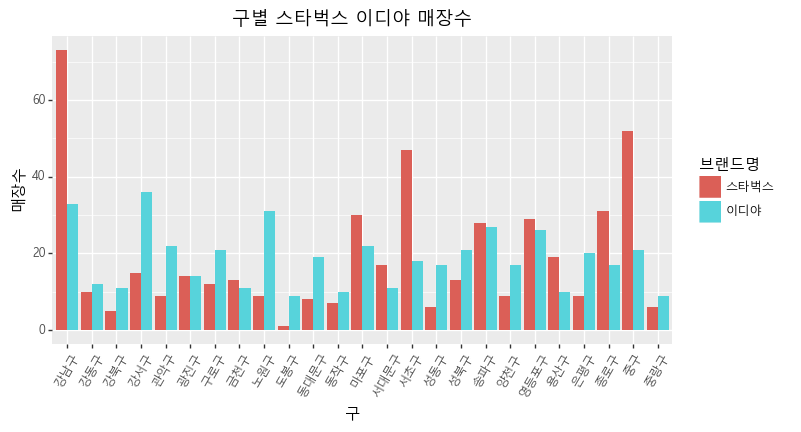

<ggplot: (-9223371872000066244)>

In [69]:
(ggplot(df_cafe_brand)
+ aes(x='구', y='매장수',fill='브랜드명')
+ geom_bar(stat='identity', position='dodge')
+ ggtitle('구별 스타벅스 이디야 매장수')
+ theme(text=element_text(family=font_name), axis_text_x=element_text(rotation=60), figure_size=(8,4))
)

In [70]:
df_cafe.groupby(['시군구명'])['상호명'].count()

시군구명
강남구     106
강동구      22
강북구      16
강서구      51
관악구      31
광진구      28
구로구      33
금천구      24
노원구      40
도봉구      10
동대문구     27
동작구      17
마포구      52
서대문구     28
서초구      65
성동구      23
성북구      34
송파구      55
양천구      26
영등포구     55
용산구      29
은평구      29
종로구      48
중구       73
중랑구      15
Name: 상호명, dtype: int64

In [71]:
df_cafe_gu = pd.DataFrame(df_cafe.groupby(['시군구명'])['상호명'].count())
df_cafe_gu.head()

상호명
시군구명     
강남구   106
강동구    22
강북구    16
강서구    51
관악구    31

## choropleth 그리기

 - 구별로 매장수를 표현하기 위해 GeoJSON 파일로드
 - 파일출처

In [72]:
import json

geo_path = 'c://BigData/Opendata/data/seoul_municipalities_geo_simple.json'
geo_json = json.load(open(geo_path, encoding='utf-8'))

## 스타벅스 이디야 카페 매장 합계 분포

In [73]:
folium.Map?

Init signature:
folium.Map(
    ['location=None', "width='100%'", "height='100%'", "left='0%'", "top='0%'", "position='relative'", "tiles='OpenStreetMap'", 'API_key=None', 'max_zoom=18', 'min_zoom=0', 'max_native_zoom=None', 'zoom_start=10', 'world_copy_jump=False', 'no_wrap=False', 'attr=None', 'min_lat=-90', 'max_lat=90', 'min_lon=-180', 'max_lon=180', 'max_bounds=False', 'detect_retina=False', "crs='EPSG3857'", 'control_scale=False', 'prefer_canvas=False', 'no_touch=False', 'disable_3d=False', "subdomains='abc'", 'png_enabled=False', 'zoom_control=True'],
)
Docstring:     
Create a Map with Folium and Leaflet.js

Generate a base map of given width and height with either default
tilesets or a custom tileset URL. The following tilesets are built-in
to Folium. Pass any of the following to the "tiles" keyword:

    - "OpenStreetMap"
    - "Mapbox Bright" (Limited levels of zoom for free tiles)
    - "Mapbox Control Room" (Limited levels of zoom for free tiles)
    - "Stamen" (Terrain, T

In [74]:
map.choropleth?

Signature: map.choropleth(*args, **kwargs)
Docstring:
Call the Choropleth class with the same arguments.

This method may be deleted after a year from now (Nov 2018).
File:      c:\anaconda3\lib\site-packages\folium\folium.py
Type:      method


In [75]:

map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                 zoom_start=11)

map.choropleth(geo_data = geo_json,
               data = df_cafe_gu['상호명'],
               columns = [df_cafe_brand.index, df_cafe_gu['상호명']],
               fill_color = 'Purples',
               key_on = 'feature.properties.name',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)


for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '스타벅스' :
        icon_color = 'green'
    else:
        icon_color = 'blue'    
    
    folium.CircleMarker(
        location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

map

## 스타벅스 매장 분포

In [76]:
df_cafe_temp = df_cafe[df_cafe['브랜드명'] == '스타벅스']
df_cafe_temp.head()

상가업소번호             상호명     지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
1619   19998811       스타벅스종로3가점   종로3가점         Q       음식       Q12   커피점/카페   
12480  20283351  스타벅스커피여의도IFC1F     NaN         Q       음식       Q12   커피점/카페   
12491  20288646            스타벅스    삼성역점         Q       음식       Q12   커피점/카페   
13541  20597950            스타벅스  신림포도몰점         Q       음식       Q12   커피점/카페   
13762  20825451      스타벅스신림사거리점  신림사거리점         Q       음식       Q12   커피점/카페   

      상권업종소분류코드     상권업종소분류명 표준산업분류코드  ...        건물명                 도로명주소  \
1619     Q12A01  커피전문점/카페/다방   I56220  ...        NaN    서울특별시 종로구 종로 113-1   
12480    Q12A01  커피전문점/카페/다방   I56220  ...   서울국제금융센터   서울특별시 영등포구 국제금융로 10   
12491    Q12A01  커피전문점/카페/다방   I56220  ...       제일빌딩  서울특별시 강남구 테헤란로103길 9   
13541    Q12A01  커피전문점/카페/다방   I56220  ...        포도몰     서울특별시 관악구 신림로 330   
13762    Q12A01  커피전문점/카페/다방   I56220  ...       영일빌딩  서울특별시 관악구 남부순환로 1619   

        구우편번호   신우편번호  동정보  층정보  호정보          경도         위도  브랜드명  
1619   110123  3139.0  NaN    1  NaN  126.990207  37.570585  스타벅스  
12480  150945  7326.0  NaN    3  NaN  126.924863  37.525172  스타벅스  
12491  135090  6173.0  NaN    1  NaN  127.063878  37.510038  스타벅스  
13541  151930  8777.0  NaN    1  NaN  126.930216  37.483845  스타벅스  
13762  151890  8754.0  NaN    2  NaN  126.930487  37.484631  스타벅스  

[5 rows x 40 columns]

In [77]:
df_cafe_starbucks = pd.DataFrame(df_cafe_temp.groupby(['시군구명'])['상호명'].count())
df_cafe_starbucks.head()

상호명
시군구명     
강남구    73
강동구    10
강북구     5
강서구    15
관악구     9

In [78]:
df_cafe_starbucks = pd.DataFrame(df_cafe_temp.groupby(['시군구명'])['상호명'].count())
df_cafe_starbucks
df_cafe_starbucks.columns = ['매장수']
df_cafe_starbucks.head()

매장수
시군구명     
강남구    73
강동구    10
강북구     5
강서구    15
관악구     9

In [79]:
df_cafe_starbucks.columns

Index(['매장수'], dtype='object')

In [83]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                 zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_json,
               data = df_cafe_starbucks['매장수'],
               columns = [df_cafe_starbucks.index, df_cafe_starbucks['매장수']],
               fill_color = 'YlGn',
               key_on = 'feature.properties.name',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)


for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '스타벅스' :
        icon_color = 'green'    
    
        folium.CircleMarker(
            location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
            radius=3,
            popup=popup_name,
            color= icon_color,
            fill=True,
            fill_color=icon_color
        ).add_to(map)


map

## 이디야 매장 분포

In [85]:
df_cafe_temp = df_cafe[df_cafe['브랜드명'] == '이디야']
df_cafe_ediya = pd.DataFrame(df_cafe_temp.groupby(['시군구명'])['상호명'].count())
df_cafe_ediya.columns = ['매장수']
df_cafe_ediya.head()

매장수
시군구명     
강남구    33
강동구    12
강북구    11
강서구    36
관악구    22

In [86]:

map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                 zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_json,
               data = df_cafe_ediya['매장수'],
               columns = [df_cafe_ediya.index, df_cafe_ediya['매장수']],
               fill_color = 'PuBu',
               key_on = 'feature.properties.name',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)


for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '이디야' :
        icon_color = 'blue'    
    
        folium.CircleMarker(
            location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
            radius=3,
            popup=popup_name,
            color= icon_color,
            fill=True,
            fill_color=icon_color
        ).add_to(map)


map

# 매장수 크기를 반영해 CircleMaker 그리기

## Pandas의 reshaping data 활용하기

![reshaping data](/data/reshaping_data.jpg)

 * 출처 : <https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf>
 * reshaping 관련 문서: <https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html>

In [87]:
df_cafe_brand.head()

구  브랜드명  매장수
0  강남구  스타벅스   73
1  강남구   이디야   33
2  강동구  스타벅스   10
3  강동구   이디야   12
4  강북구  스타벅스    5

In [89]:
df_cafe_brand_vs = df_cafe_brand.pivot_table(index='구',
                                             columns='브랜드명',
                                             values='매장수')
df_cafe_brand_vs.columns =['스타벅스','이디야']
df_cafe_brand_vs.head()

스타벅스  이디야
구             
강남구    73   33
강동구    10   12
강북구     5   11
강서구    15   36
관악구     9   22

In [90]:
df_cafe_brand_vs['매장수비교'] = df_cafe_brand_vs.apply( \
    lambda x : 1 if x['스타벅스'] > x['이디야'] else 0, axis=1)
df_cafe_brand_vs.head()

스타벅스  이디야  매장수비교
구                    
강남구    73   33      1
강동구    10   12      0
강북구     5   11      0
강서구    15   36      0
관악구     9   22      0